# DSA210 Final Project - Obesity & Mental Health Analysis
Prepared for the Spring 2025 term

This notebook explores the relationship between obesity, mental health, and personality traits. Using three datasets, we perform data cleaning, exploratory data analysis (EDA), hypothesis testing, and machine learning modeling.

## Import Libraries and Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

sns.set(style="whitegrid")

mh = pd.read_csv("/mnt/data/cleaned_mental_health.csv")
drug = pd.read_csv("/mnt/data/cleaned_drug.csv")
obesity = pd.read_csv("/mnt/data/cleaned_obesity.csv")

## Exploratory Data Analysis - Mental Health

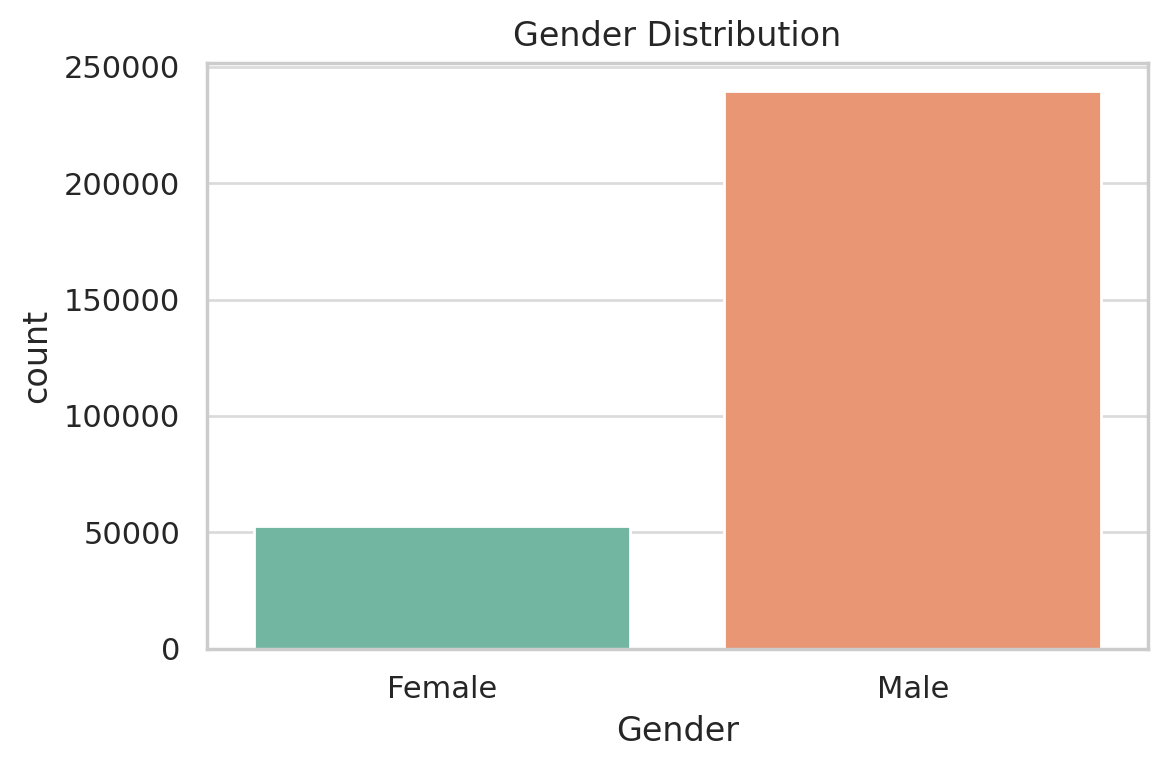

In [2]:
plt.figure(figsize=(6, 4))
sns.countplot(data=mh, x='Gender', palette='Set2')
plt.title("Gender Distribution")
plt.tight_layout()
plt.show()

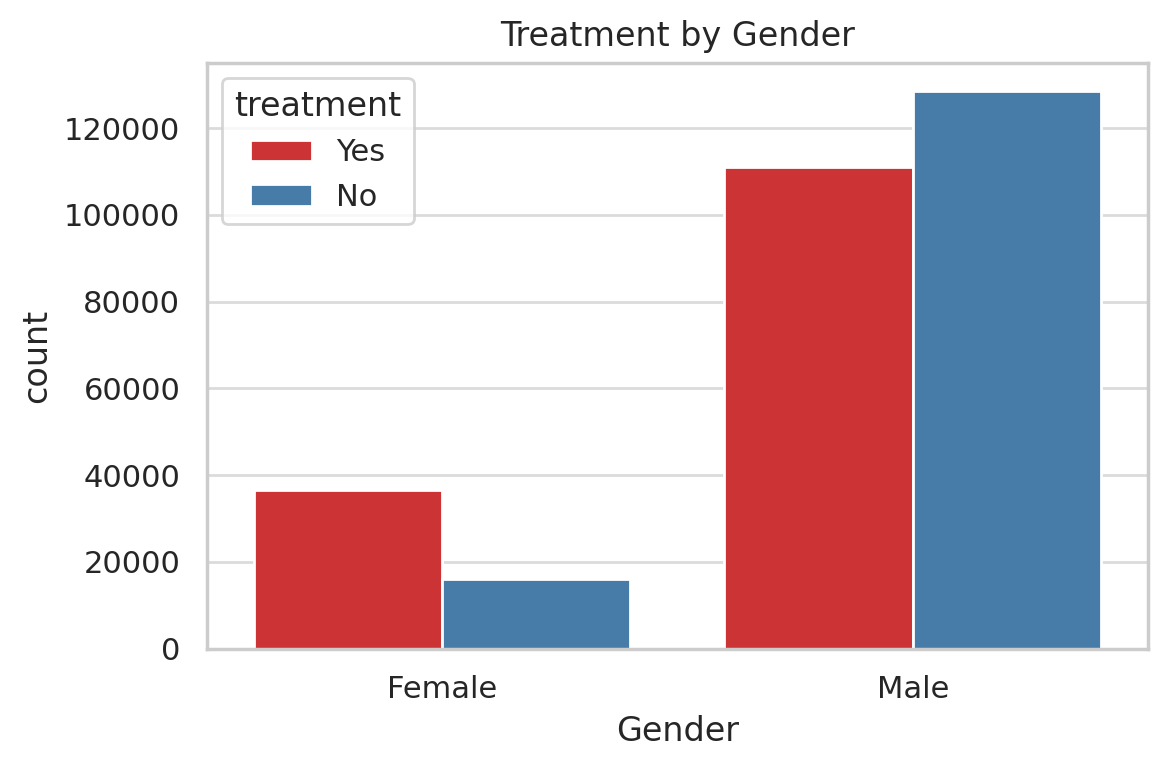

In [3]:
plt.figure(figsize=(6, 4))
sns.countplot(data=mh, x='Gender', hue='treatment', palette='Set1')
plt.title("Treatment by Gender")
plt.tight_layout()
plt.show()

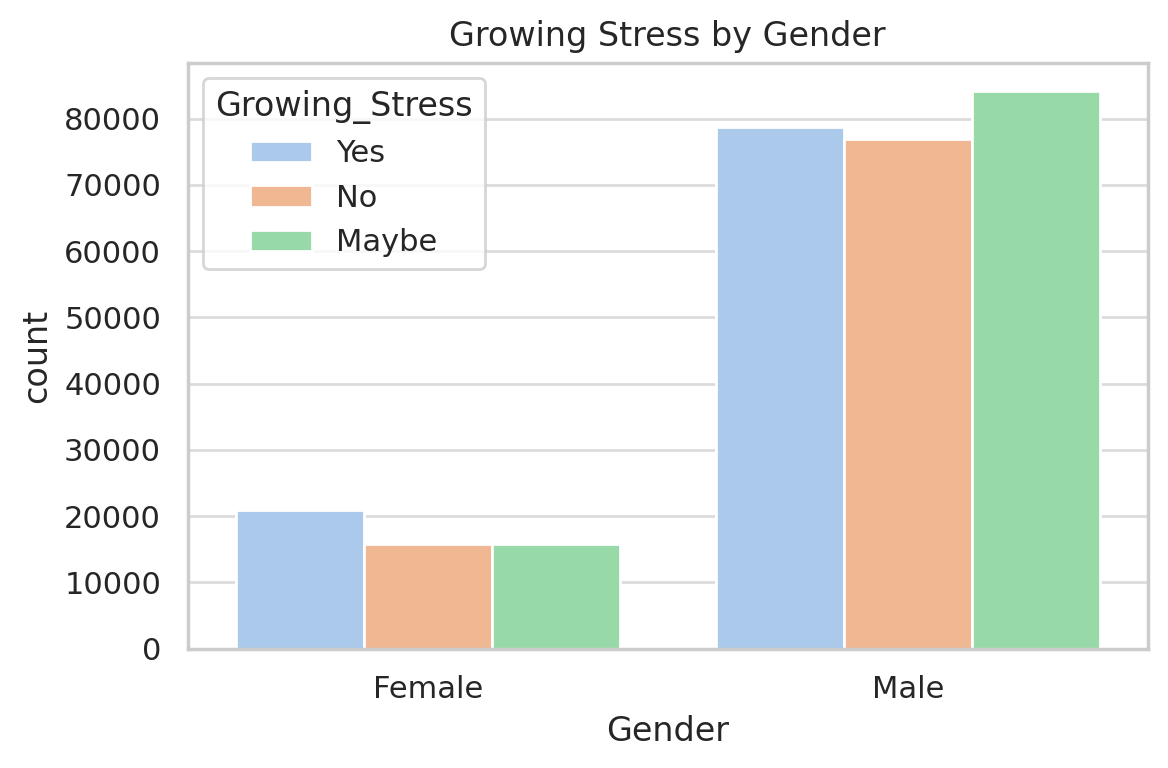

In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(data=mh, x='Gender', hue='Growing_Stress', palette='pastel')
plt.title("Growing Stress by Gender")
plt.tight_layout()
plt.show()

## Hypothesis Test: Is Treatment Independent of Gender?

In [5]:
contingency = pd.crosstab(mh['Gender'], mh['treatment'])
chi2, p, dof, expected = chi2_contingency(contingency)
print("Chi-Square Test Statistic:", chi2)
print("p-value:", p)
if p < 0.05:
    print("Reject the null hypothesis: Treatment is dependent on gender.")
else:
    print("Fail to reject the null hypothesis: No significant relationship.")

Chi-Square Test Statistic: 9179.541147071046
p-value: 0.0
Reject the null hypothesis: Treatment is dependent on gender.


## Machine Learning: Predicting Treatment

In [6]:
df = mh.copy()
label_cols = ['Gender', 'Growing_Stress', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest']
df = df[df['treatment'].isin(['Yes', 'No'])]
df['treatment'] = df['treatment'].map({'Yes': 1, 'No': 0})
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

X = df[label_cols]
y = df['treatment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5644054269752594
              precision    recall  f1-score   support

           0       0.54      0.89      0.67     43529
           1       0.69      0.24      0.36     44181

    accuracy                           0.56     87710
   macro avg       0.61      0.57      0.52     87710
weighted avg       0.61      0.56      0.51     87710



## Conclusion
This notebook demonstrates that gender may play a role in mental health treatment rates, based on the chi-square test.
Additionally, personality and stress-related features show some predictive power for treatment likelihood.
In future steps, we can combine these insights with drug consumption and obesity data for a broader model.